In [1]:
import glob
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,7.5]

In [2]:
lc_fnames = glob.glob('pps/P*PNX*SRCTSR*.FTZ')

lcs = []
slcs = []
hlcs = []
for file in lc_fnames:
    hdul = fits.open(file)
    time = hdul[1].data.field('TIME')
    rate = hdul[1].data.field('RATE')
    err = hdul[1].data.field('ERROR')
    soft = hdul[1].data.field('RATE1') + hdul[1].data.field('RATE2') + hdul[1].data.field('RATE3')
    hard = hdul[1].data.field('RATE4') + hdul[1].data.field('RATE5')
    ers = hdul[1].data.field('RATE1_ERR') + hdul[1].data.field('RATE2_ERR') + hdul[1].data.field('RATE3_ERR')
    erh = hdul[1].data.field('RATE4_ERR') + hdul[1].data.field('RATE5_ERR')
    gtis = []
    for i in hdul[2].data:
        gtis.append([i[0],i[1]])
    lcs.append(Lightcurve(time, rate, err, gti=gtis, input_counts=False))
    slcs.append(Lightcurve(time, soft, ers, gti=gtis, input_counts=False))
    hlcs.append(Lightcurve(time, hard, erh, gti=gtis, input_counts=False))
    

/home/rwebbe/.local/lib/python3.8/site-packages/stingray/lightcurve.py:520: UserWarning: There are non-finite points in the data, but they are outside GTIs. 
  warnings.warn("There are non-finite points in the data, but they are outside GTIs. ")
/home/rwebbe/.local/lib/python3.8/site-packages/stingray/lightcurve.py:520: UserWarning: There are non-finite points in the data, but they are outside GTIs. 
  warnings.warn("There are non-finite points in the data, but they are outside GTIs. ")


In [3]:
lc_fnames

['pps/P0886040201PNX000SRCTSR8014.FTZ']

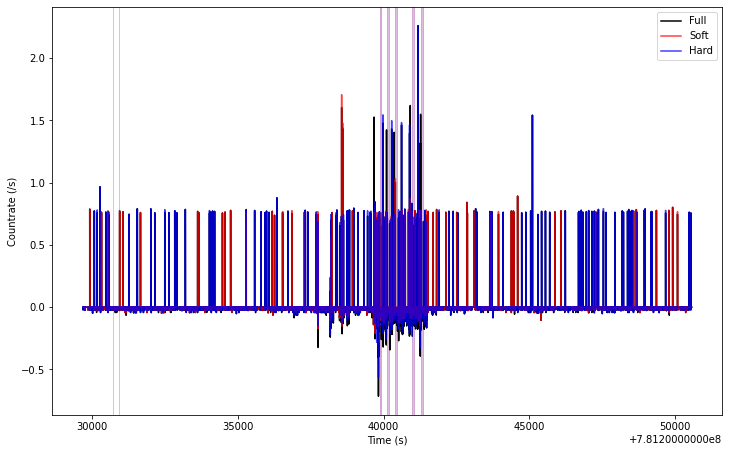

In [4]:
for i in range(len(lcs)):
    plt.xlabel('Time (s)')
    plt.ylabel('Countrate (/s)')
    plt.plot(lcs[i].time, lcs[i].countrate, color='k', ds='steps-mid', label='Full')
    plt.plot(slcs[i].time, slcs[i].countrate, color='r', ds='steps-mid', alpha=0.75, label='Soft')
    plt.plot(hlcs[i].time, hlcs[i].countrate, color='b', ds='steps-mid', alpha=0.75, label='Hard')
    plt.legend(loc='upper right')
    for j in range(len(gtis)-1):
        plt.axvspan(gtis[j][1],gtis[j+1][0],color='purple',alpha=0.25)
    plt.show()

/home/rwebbe/.local/lib/python3.8/site-packages/stingray/lightcurve.py:408: RuntimeWarning: invalid value encountered in multiply
  counts_err = self._countrate_err * self.dt
/home/rwebbe/.local/lib/python3.8/site-packages/stingray/lightcurve.py:388: RuntimeWarning: invalid value encountered in multiply
  counts = self._countrate * self.dt


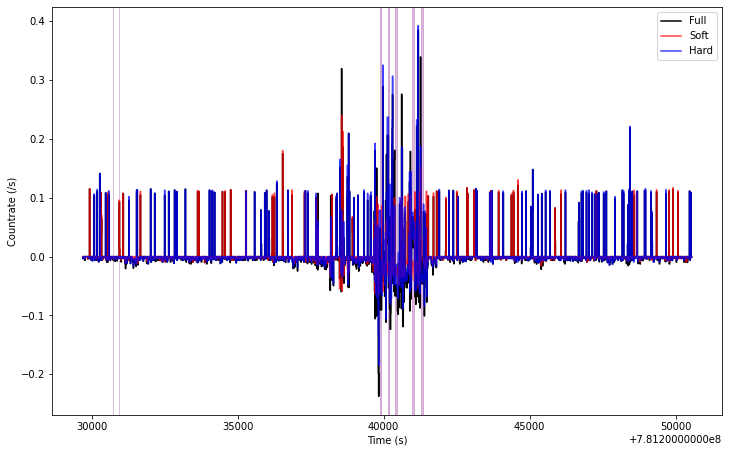

In [5]:
for i in range(len(lcs)):
    plt.xlabel('Time (s)')
    plt.ylabel('Countrate (/s)')
    plt.plot(lcs[i].rebin(10).time, lcs[i].rebin(10).countrate, color='k', ds='steps-mid', label='Full')
    plt.plot(slcs[i].rebin(10).time, slcs[i].rebin(10).countrate, color='r', ds='steps-mid', alpha=0.75, label='Soft')
    plt.plot(hlcs[i].rebin(10).time, hlcs[i].rebin(10).countrate, color='b', ds='steps-mid', alpha=0.75, label='Hard')
    plt.legend(loc='upper right')
    for j in range(len(gtis)-1):
        plt.axvspan(gtis[j][1],gtis[j+1][0],color='purple',alpha=0.25)
    plt.show()

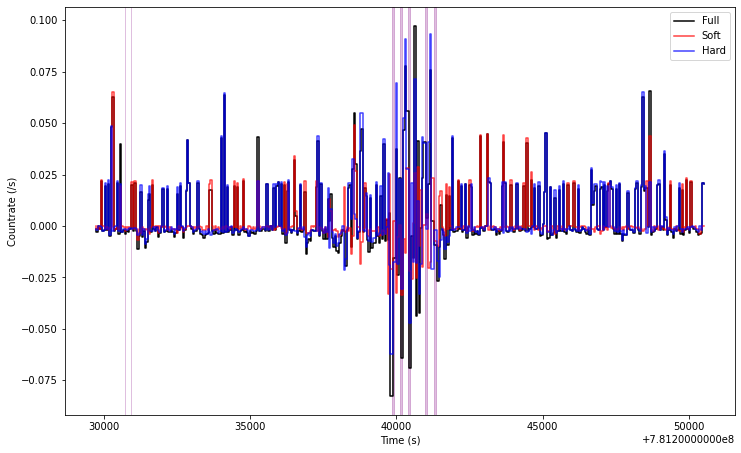

In [6]:
for i in range(len(lcs)):
    plt.xlabel('Time (s)')
    plt.ylabel('Countrate (/s)')
    plt.plot(lcs[i].rebin(50).time, lcs[i].rebin(50).countrate, color='k', ds='steps-mid', label='Full')
    plt.plot(slcs[i].rebin(50).time, slcs[i].rebin(50).countrate, color='r', ds='steps-mid', alpha=0.75, label='Soft')
    plt.plot(hlcs[i].rebin(50).time, hlcs[i].rebin(50).countrate, color='b', ds='steps-mid', alpha=0.75, label='Hard')
    plt.legend(loc='upper right')
    for j in range(len(gtis)-1):
        plt.axvspan(gtis[j][1],gtis[j+1][0],color='purple',alpha=0.25)
    plt.show()

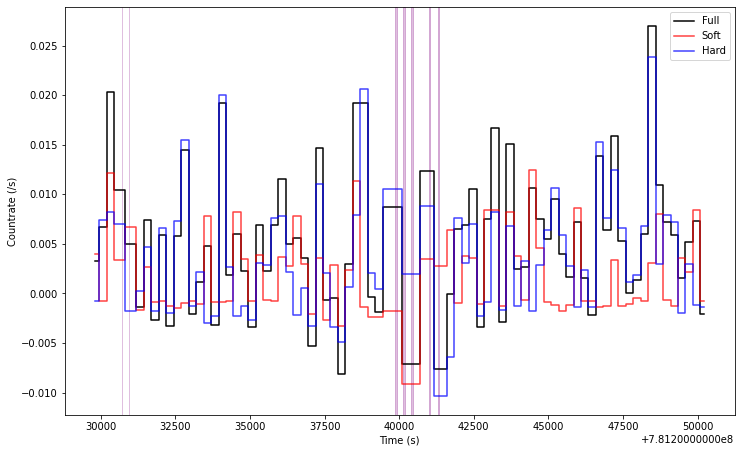

In [7]:
for i in range(len(lcs)):
    plt.xlabel('Time (s)')
    plt.ylabel('Countrate (/s)')
    plt.plot(lcs[i].rebin(250).time, lcs[i].rebin(250).countrate, color='k', ds='steps-mid', label='Full')
    plt.plot(slcs[i].rebin(250).time, slcs[i].rebin(250).countrate, color='r', ds='steps-mid', alpha=0.75, label='Soft')
    plt.plot(hlcs[i].rebin(250).time, hlcs[i].rebin(250).countrate, color='b', ds='steps-mid', alpha=0.75, label='Hard')
    plt.legend(loc='upper right')
    for j in range(len(gtis)-1):
        plt.axvspan(gtis[j][1],gtis[j+1][0],color='purple',alpha=0.25)
    plt.show()

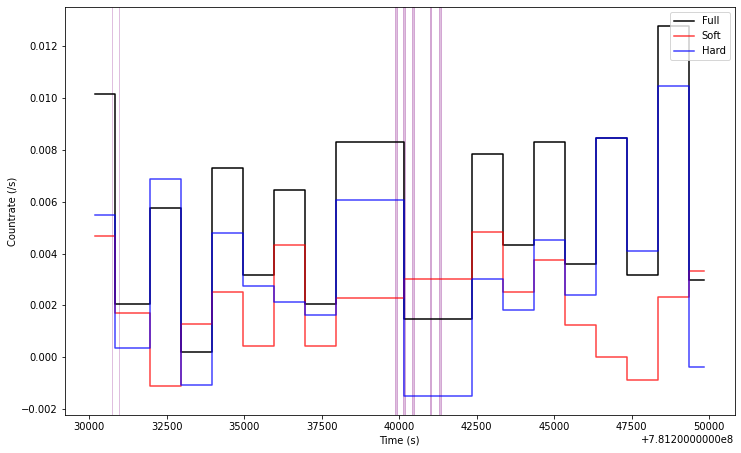

In [8]:
for i in range(len(lcs)):
    plt.xlabel('Time (s)')
    plt.ylabel('Countrate (/s)')
    plt.plot(lcs[i].rebin(1000).time, lcs[i].rebin(1000).countrate, color='k', ds='steps-mid', label='Full')
    plt.plot(slcs[i].rebin(1000).time, slcs[i].rebin(1000).countrate, color='r', ds='steps-mid', alpha=0.75, label='Soft')
    plt.plot(hlcs[i].rebin(1000).time, hlcs[i].rebin(1000).countrate, color='b', ds='steps-mid', alpha=0.75, label='Hard')
    plt.legend(loc='upper right')
    for j in range(len(gtis)-1):
        plt.axvspan(gtis[j][1],gtis[j+1][0],color='purple',alpha=0.25)
    plt.show()